In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
working_directory = os.getcwd()
print(working_directory)

/Users/mushtariy/pyprojects/Machine_Learning


In [2]:
path = working_directory + '/plant.csv'

In [3]:
df = pd.read_csv(path)
df.head(10)

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
5,13.97,39.16,1016.05,84.60,470.96
6,22.10,71.29,1008.20,75.38,442.35
7,14.47,41.76,1021.98,78.41,464.00
8,31.25,69.51,1010.25,36.83,428.77
9,6.77,38.18,1017.80,81.13,484.31


In [4]:
x = df.drop(['PE'], axis = 1).values
y = df['PE'].values

In [5]:
print(y)

[480.48 445.75 438.76 ... 465.96 450.93 451.67]


In [6]:
print(x)

[[   8.34   40.77 1010.84   90.01]
 [  23.64   58.49 1011.4    74.2 ]
 [  29.74   56.9  1007.15   41.91]
 ...
 [  15.99   43.34 1014.2    78.66]
 [  17.65   59.87 1018.58   94.65]
 [  23.68   51.3  1011.86   71.24]]


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(x_test)
print(y_pred)

[433.36241603 448.38864548 445.88661799 ... 456.06061126 446.91190634
 432.57326179]


In [10]:
model.predict([[8.34,40.77,1010.84,90.01]])

array([477.14864252])

In [11]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9298994694436788

[]

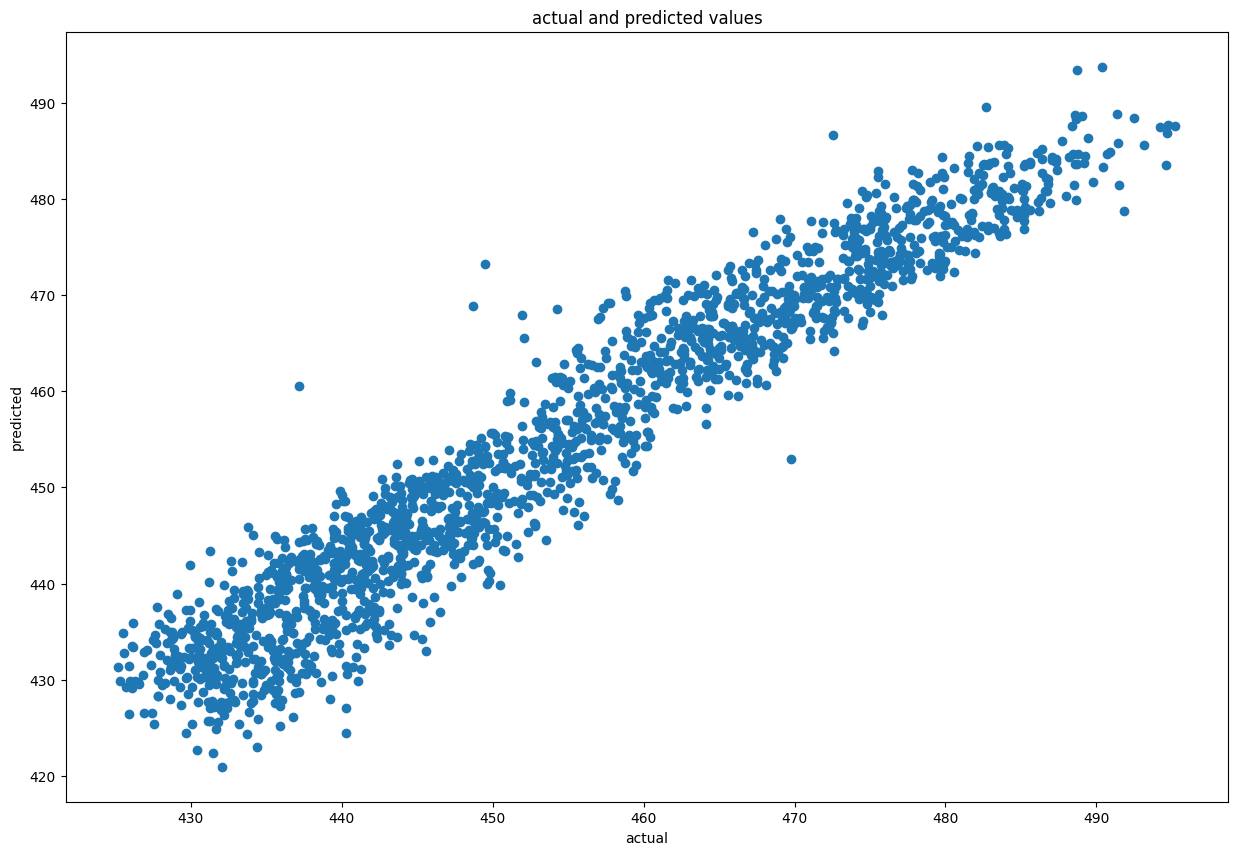

In [12]:
plt.figure(figsize = (15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('actual and predicted values')
plt.plot()


In [14]:
new_pred_df = pd.DataFrame({'Actual Value': y_test, 'predicted value': y_pred, 'Difference': y_test - y_pred})
new_pred_df.head(10)

,Actual Value,predicted value,Difference
0,426.18,433.362416,-7.182416
1,451.10,448.388645,2.711355
2,442.87,445.886618,-3.016618
3,443.70,445.991729,-2.291729
4,460.59,462.811283,-2.221283
5,438.00,440.848694,-2.848694
6,484.31,482.724175,1.585825
7,464.18,462.228915,1.951085
8,452.53,451.252188,1.277812
9,445.54,445.418624,0.121376
